# НИУ ВШЭ НН. Факультет ИМиКН. Методы Анализа Данных. Экзамен. Практическая часть.

Вариант: 19
Выполнил: Москвитин Олег Евгеньевич

## Загрузка библиотек

In [1]:
#@title Загрузка библиотек

from google.colab import files
import os

import pandas as pd

# Предобработка данных
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Кластеризация данных
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics.cluster import adjusted_rand_score

# Отрисовка графиков
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Работа с графами
import networkx as nx
!apt-get install graphviz graphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libatk1.0-0 libatk1.0-data libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk librsvg2-common
  libxcomposite1 libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libatk1.0-0 libatk1.0-data libgail-common libgail18 libgraphviz-dev
  libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxcomposite1 libxdot4
0 upgraded, 12 newly installed, 0 to remove and 1 not upgraded.
Need to get 2,496 kB of archives.
After this operation, 7,963 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libatk1.0-data all 2.36.0-3build1 [2,824 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main a

## Загрузка данных

In [3]:
#@title Загрузка входных данных

file_path = '25MAG_Dec_26_Practice_19.xls'

if not os.path.isfile(file_path):
    uploaded = files.upload()

Saving 25MAG_Dec_26_Practice_19.xls to 25MAG_Dec_26_Practice_19.xls


In [9]:
#@title Считываем данные в DataFrame

columns = [
    'возраст',
    'количество иждивенцев',
    'доход',
    'срок проживания в регионе',
    'оценка автомобиля',
    'размер кредита',
    'delete_1',
    'delete_2',
    'надежность заемщика'
]

df = pd.read_excel(file_path, header=None, names=columns)

y = df['надежность заемщика']

df = df.drop(columns=['delete_1', 'delete_2', 'надежность заемщика'])
columns = columns[:-3]

df.head()

,возраст,количество иждивенцев,доход,срок проживания в регионе,оценка автомобиля,размер кредита
0,34,2,36500,6,36000,360000
1,51,3,18600,17,21000,200000
2,44,2,11300,13,12000,117000
3,28,0,8500,3,6000,67000
4,41,2,15800,11,16000,159000


In [10]:
#@title Проверка на пропуски

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   возраст                    60 non-null     int64
 1   количество иждивенцев      60 non-null     int64
 2   доход                      60 non-null     int64
 3   срок проживания в регионе  60 non-null     int64
 4   оценка автомобиля          60 non-null     int64
 5   размер кредита             60 non-null     int64
dtypes: int64(6)
memory usage: 2.9 KB


> Пропусков нет

## Первичный анализ

In [15]:
#@title Основные характеристики признаков: среднее, стандартное отклонение, медиана, 1-ый и 3-ий квартили, min и max

df.describe()

,возраст,количество иждивенцев,доход,срок проживания в регионе,оценка автомобиля,размер кредита
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,40.066667,2.083333,20288.333333,10.000000,20316.666667,202983.333333
std,7.498851,0.944057,10277.523471,4.650497,10148.877648,102417.307142
min,26.000000,0.000000,2600.000000,2.000000,2000.000000,19000.000000
25%,34.750000,1.000000,11375.000000,6.750000,12000.000000,121250.000000
50%,39.000000,2.000000,20100.000000,9.000000,20000.000000,200500.000000
75%,45.500000,3.000000,27600.000000,14.000000,27250.000000,271000.000000
max,54.000000,4.000000,40300.000000,19.000000,43000.000000,422000.000000


Общая характеристика данных:

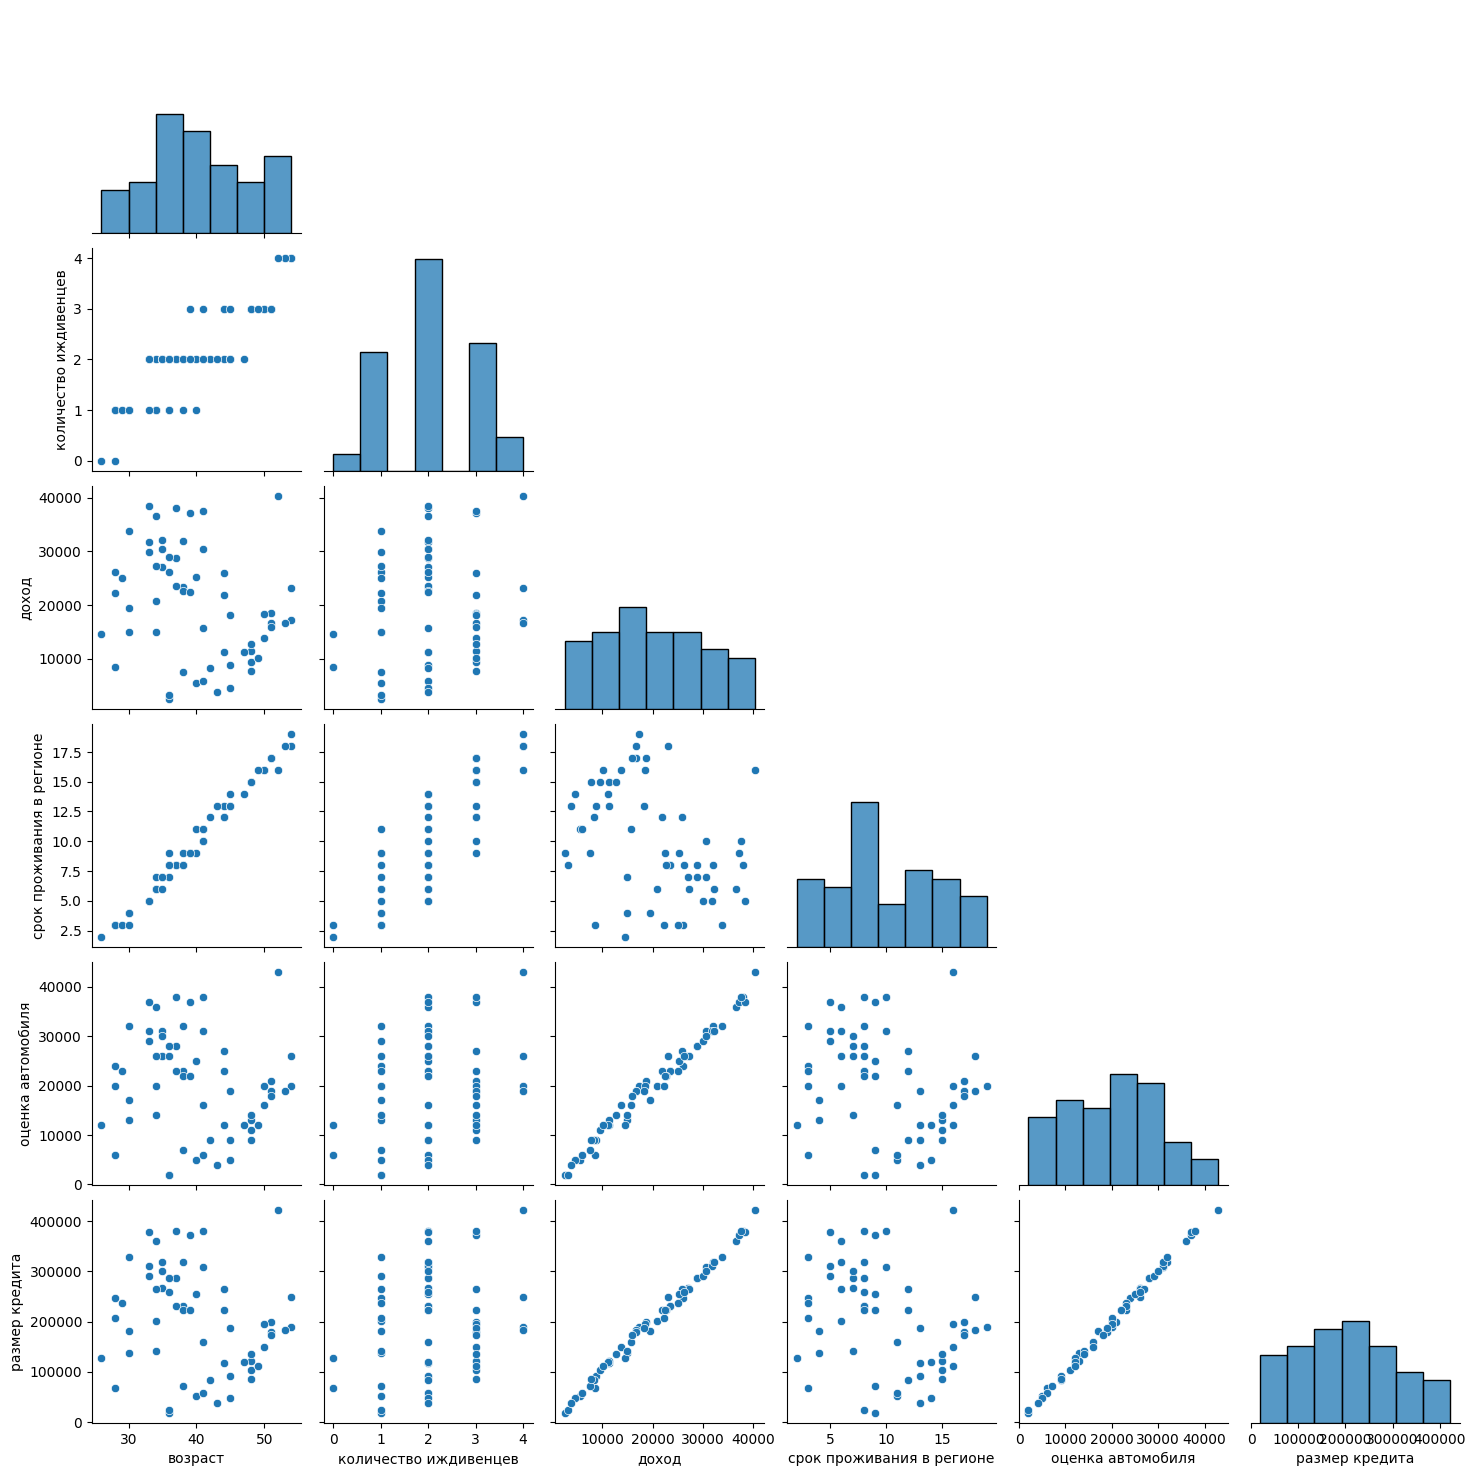

In [13]:
#@title Анализ выборки

sns.pairplot(df, corner=True)
plt.show()

**Выводы:**

1. Между некоторыми парами признаков наблюдается сильная линейная связь. Подсчитаем коэффициенты корреляции, чтобы убедиться в этом;

2. Признак "количество иждивенцев" имеет биномиальное распределение

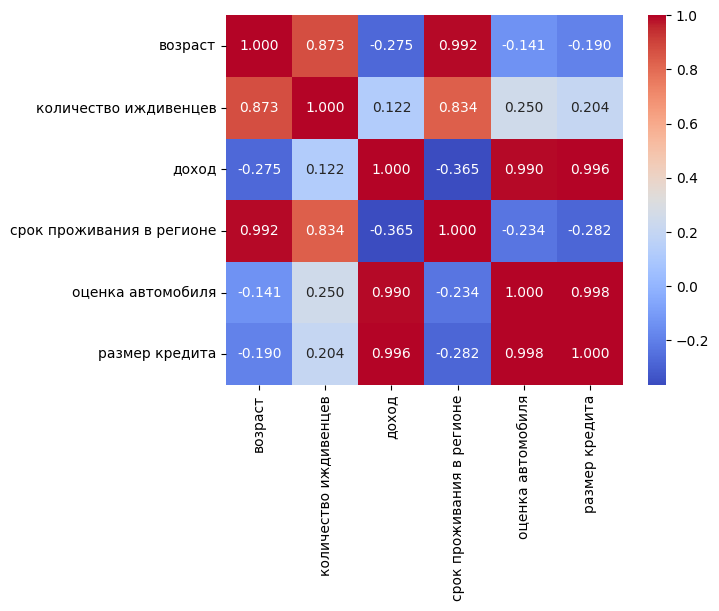

In [16]:
#@title Корреляционная матрица

corr_mat = df.corr()

fig = sns.heatmap(corr_mat, annot=True, fmt=".3f", cmap="coolwarm")
plt.show()

Следующие пары признаков линейно зависимы:

* (Размер кредита, доход);
* (Размер кредита, оценка автомобиля);
* (Оценка автомобиля, доход);
* (Возраст, Срок проживания в регионе).
* (Кол-во иждивенцев, возраст) - хотя связь не такая сильная, как для пар выше.

> **Вывод**: кажется возможным почти без потери информации спроецировать исходную выборку в двумерное пространство, так как все данные делятся на 2 группы по линейным зависимостям: (Размер кредита, стоимость автомобиля, доход) и (Возраст, кол-во иждивенцев, срок проживания в регионе)

Данные **необходимо стандартизовать / нормировать**, поскольку:

* Данные имеют разный масштаб: возраст измеряется в десятках, а доход и стоимость автомобиля - в десятках тысяч. При подсчете расстояния между объектами выборки бОльшее влияние будет оказывать признак с бОльшим порядком значений. Чтобы все признаки были равнозначными, данные необходимо стандартизировать.

In [22]:
#@title Стандартизация данных

X = pd.DataFrame(StandardScaler().fit_transform(df.to_numpy()))

# Проверка, что mean = 0 и std = 1 по каждому признаку
X.describe()

,0,1,2,3,4,5
count,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
mean,-4.477900e-16,-1.628327e-16,1.110223e-16,1.480297e-17,-1.332268e-16,-9.621933e-17
std,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00
min,-1.891673e+00,-2.225412e+00,-1.735594e+00,-1.734763e+00,-1.820028e+00,-1.811568e+00
25%,-7.149807e-01,-1.157214e+00,-8.745835e-01,-7.047477e-01,-8.263821e-01,-8.047769e-01
50%,-1.434444e-01,-8.901646e-02,-1.847942e-02,-2.168454e-01,-3.146545e-02,-2.445183e-02
75%,7.306699e-01,9.791811e-01,7.174267e-01,8.673817e-01,6.889278e-01,6.697174e-01
max,1.873743e+00,2.047379e+00,1.963561e+00,1.951609e+00,2.253920e+00,2.156520e+00


## Снижение размерности.

Как и было сказано ранее, признаки делятся на 2 группы, внутри каждой из групп существуют попарно линейные связи, что позволяет понять, что можно перейти в размерность в 2 почти без потери информации

* Часть информации все же будет потеряна. Если бы коэффициенты корреляции внутри каждой из групп были бы равны 1, тогда информация не была бы потеряна.

In [31]:
#@title Метод для подсчета матрицы расстояний

from scipy.spatial.distance import chebyshev, cityblock, euclidean

def dist_matrix(Z : pd.DataFrame, metric):
    n_objects = len(Z)

    dist_matrix = np.zeros((n_objects, n_objects))

    for i in range(n_objects):
        for j in range(i, n_objects):
            dist_matrix[i, j] = round(metric(Z.iloc[i], Z.iloc[j]), 2)
            dist_matrix[j, i] = dist_matrix[i, j]

    return dist_matrix

In [24]:
#@title Расстояние между клиентами (с использованием евклидовой метрики)

display(pd.DataFrame(dist_matrix(X, euclidean)).style.set_caption("Расстояние между клиентами").format("{:.2f}"))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.00,4.45,4.65,5.51,3.75,5.03,5.56,0.67,5.10,2.32,1.43,5.30,5.35,2.43,1.66,4.01,4.69,0.38,2.91,1.96,5.01,3.33,1.58,3.19,4.87,2.99,5.13,1.00,2.53,4.74,0.87,2.29,5.57,2.72,5.25,4.67,5.95,1.44,4.33,5.87,1.36,3.88,3.82,2.14,0.78,4.86,2.47,4.85,2.55,4.76,5.37,1.69,1.60,1.48,5.82,5.84,1.05,1.81,5.32,4.02
1,4.45,0.00,2.18,5.83,2.26,1.44,3.84,4.26,2.45,2.89,3.79,1.75,1.24,4.92,3.44,4.65,5.80,4.81,3.94,4.10,2.74,4.55,2.96,1.50,0.89,4.85,3.92,3.50,4.81,1.42,4.20,2.98,2.05,1.83,1.17,0.34,4.57,3.27,0.28,4.61,3.48,3.93,1.21,2.69,3.95,1.26,2.87,1.95,2.64,0.47,3.22,3.69,4.46,5.17,2.97,3.24,3.69,3.19,1.54,3.91
2,4.65,2.18,0.00,3.82,0.94,1.28,1.68,4.72,0.48,2.39,4.61,1.30,3.09,3.95,3.11,2.95,4.03,5.00,2.73,3.43,0.63,3.13,3.35,2.14,1.59,3.62,1.77,3.72,3.78,3.54,4.06,2.44,1.39,2.75,2.90,1.98,2.39,3.21,1.98,2.44,3.34,2.21,1.61,2.53,3.93,1.31,2.27,0.46,2.12,1.91,1.16,4.67,3.93,4.75,1.20,1.33,3.63,2.89,1.43,5.72
3,5.51,5.83,3.82,0.00,3.60,5.01,2.62,5.93,3.83,3.90,6.37,4.97,6.83,3.23,4.16,1.62,1.09,5.72,2.71,3.65,3.47,2.21,5.14,5.07,5.37,2.61,2.16,5.06,3.07,7.09,4.73,3.86,4.94,5.46,6.62,5.71,2.17,4.54,5.61,2.02,4.46,2.03,4.92,4.31,4.85,5.05,3.79,4.18,3.91,5.67,3.27,6.59,4.03,4.54,3.96,3.70,4.68,4.18,5.17,8.49
4,3.75,2.26,0.94,3.60,0.00,1.79,2.12,3.87,1.37,1.46,3.82,1.93,3.30,3.10,2.17,2.40,3.56,4.10,1.94,2.56,1.28,2.41,2.55,1.61,1.96,2.83,1.93,2.84,2.94,3.49,3.13,1.51,2.10,2.15,3.10,2.19,2.70,2.31,2.03,2.69,2.42,1.69,1.36,1.66,3.01,1.72,1.34,1.26,1.21,2.17,1.71,3.91,3.04,3.84,2.07,2.11,2.72,1.97,2.04,5.25
5,5.03,1.44,1.28,5.01,1.79,0.00,2.81,5.01,1.34,2.97,4.62,0.33,1.95,4.83,3.64,4.03,5.20,5.38,3.72,4.24,1.61,4.15,3.64,1.94,0.58,4.57,2.97,4.08,4.68,2.60,4.54,3.03,0.65,2.58,1.73,1.14,3.44,3.66,1.27,3.50,3.81,3.36,1.25,2.99,4.37,0.21,2.87,1.10,2.70,1.03,1.99,4.61,4.68,5.45,1.72,1.95,4.08,3.41,0.32,5.21
6,5.56,3.84,1.68,2.62,2.12,2.81,0.00,5.75,1.48,3.33,5.87,2.69,4.72,4.12,3.95,2.51,3.21,5.88,2.91,3.89,1.26,3.01,4.50,3.68,3.21,3.59,0.61,4.74,3.92,5.22,4.85,3.34,2.60,4.25,4.52,3.63,0.87,4.18,3.66,0.96,4.24,1.96,3.23,3.61,4.81,2.91,3.18,1.92,3.14,3.55,1.08,5.98,4.42,5.21,1.42,1.24,4.53,3.81,2.87,7.30
7,0.67,4.26,4.72,5.93,3.87,5.01,5.75,0.00,5.19,2.53,1.13,5.30,5.13,2.97,1.99,4.45,5.15,0.85,3.26,2.31,5.15,3.78,1.42,3.14,4.77,3.50,5.38,1.05,3.05,4.44,1.42,2.52,5.59,2.58,5.06,4.51,6.22,1.63,4.17,6.16,1.65,4.20,3.80,2.23,1.20,4.83,2.69,4.87,2.71,4.61,5.56,1.27,2.01,2.00,5.91,5.98,1.38,2.05,5.28,3.48
8,5.10,2.45,0.48,3.83,1.37,1.34,1.48,5.19,0.00,2.82,5.06,1.24,3.25,4.30,3.54,3.12,4.16,5.45,3.06,3.83,0.47,3.39,3.81,2.55,1.75,3.91,1.70,4.17,4.12,3.80,4.49,2.87,1.23,3.18,3.05,2.21,2.17,3.66,2.27,2.24,3.78,2.43,1.96,2.98,4.37,1.44,2.69,0.58,2.56,2.12,0.88,5.12,4.34,5.15,0.74,0.91,4.08,3.33,1.41,6.12
9,2.32,2.89,2.39,3.90,1.46,2.97,3.33,2.53,2.82,0.00,2.62,3.19,3.94,2.06,0.74,2.36,3.44,2.65,1.37,1.40,2.70,1.95,1.42,1.60,2.97,2.07,2.94,1.49,1.95,3.74,1.67,0.13,3.41,1.69,3.76,2.98,3.77,0.91,2.69,3.70,0.97,1.93,1.95,0.49,1.56,2.84,0.15,2.65,0.30,3.02,3.06,2.79,1.77,2.49,3.53,3.54,1.28,0.55,3.26,4.62


In [43]:
#@title Норма Фробениуса разности матриц расстояний

def frob_norm(X, X_mds):
    return np.linalg.norm(dist_matrix(X, euclidean) - dist_matrix(pd.DataFrame(X_mds), euclidean), 'fro').item()

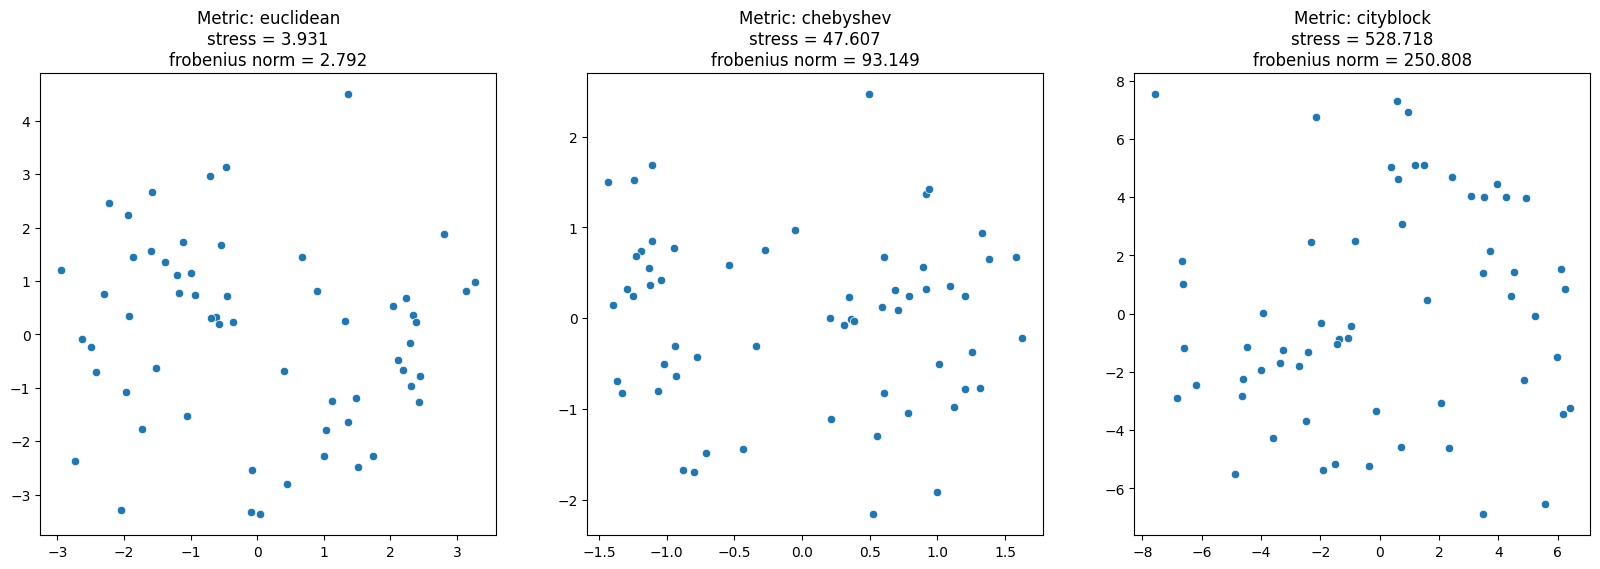

In [45]:
#@title Сравнение результатов с использованием разных метрик

from sklearn.manifold import MDS

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

mds = MDS(n_components=2, dissimilarity='precomputed')
X_mds = mds.fit_transform(dist_matrix(X, euclidean))

sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, 1], ax=axes[0])
axes[0].set_title(f'Metric: euclidean\nstress = {mds.stress_:.3f}\nfrobenius norm = {frob_norm(X, X_mds):.3f}')

X_mds = mds.fit_transform(dist_matrix(X, chebyshev))

sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, 1], ax=axes[1])
axes[1].set_title(f'Metric: chebyshev\nstress = {mds.stress_:.3f}\nfrobenius norm = {frob_norm(X, X_mds):.3f}')

X_mds = mds.fit_transform(dist_matrix(X, cityblock))

sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, 1], ax=axes[2])
axes[2].set_title(f'Metric: cityblock\nstress = {mds.stress_:.3f}\nfrobenius norm = {frob_norm(X, X_mds):.3f}')

plt.show()

> Вывод: наилучший результат получается при использовании евклидовой метрики. Норма Фробениуса между матрицей расстояний в исходном пространстве и в новой пространстве в этом случае наименьшая.

Подсчитаем normalized stress (stress-1):

$$\frac{||D-D_{MDS}||_F}{||D||_F}$$

* $D$ - матрица расстояний в исходном пространстве
* $D_{MDS}$ - в новом пространстве

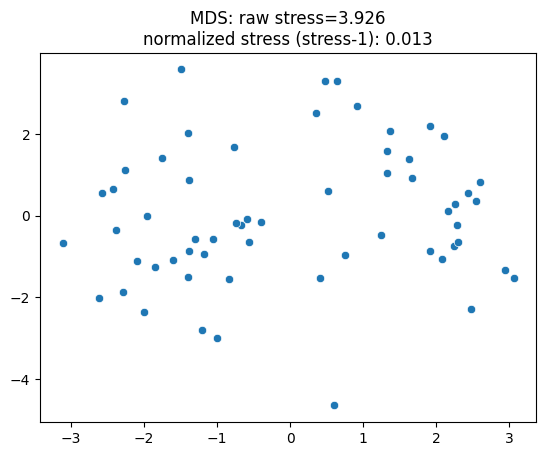

In [47]:
#@title Подсчет stress-1

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=21)
X_mds = mds.fit_transform(dist_matrix(X, euclidean))

stress_1 = np.linalg.norm(dist_matrix(X, euclidean) - dist_matrix(pd.DataFrame(X_mds), euclidean), 'fro') / np.linalg.norm(dist_matrix(X, euclidean), 'fro')

fig = sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, 1])
fig.set_title(f'MDS: raw stress={mds.stress_:.3f}\nnormalized stress (stress-1): {stress_1:.3f}')

plt.show()

> Вывод: $stress_1 < 0.05$, значит алгоритму удалось почти без потери информации понизить размерность.

## Кластеризация.

In [48]:
#@title Подсчет матрицы расстояний (с использованием евклидовой метрики)

X_dist_matrix = squareform(pdist(X, 'euclidean'))

pd.DataFrame(X_dist_matrix)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.000000,4.454819,4.651710,5.513228,3.748775,5.027389,5.559252,0.671406,5.103000,2.320924,...,5.372490,1.693950,1.603406,1.476833,5.818964,5.844993,1.051014,1.805037,5.316931,4.015133
1,4.454819,0.000000,2.181797,5.828471,2.264418,1.439337,3.840392,4.255878,2.453912,2.892528,...,3.224779,3.685477,4.456329,5.173327,2.973293,3.244398,3.691209,3.187363,1.538304,3.911082
2,4.651710,2.181797,0.000000,3.816981,0.935310,1.277060,1.683976,4.722876,0.477192,2.390196,...,1.155879,4.665486,3.931688,4.746318,1.195570,1.334685,3.631546,2.891453,1.425307,5.722659
3,5.513228,5.828471,3.816981,0.000000,3.598733,5.013229,2.621636,5.932248,3.826638,3.895962,...,3.271799,6.587192,4.034594,4.544749,3.958285,3.696431,4.675272,4.175732,5.173240,8.490638
4,3.748775,2.264418,0.935310,3.598733,0.000000,1.785363,2.117828,3.869281,1.366823,1.463728,...,1.714532,3.908632,3.043551,3.841179,2.070756,2.112976,2.715500,1.968118,2.038942,5.254584
5,5.027389,1.439337,1.277060,5.013229,1.785363,0.000000,2.813547,5.006976,1.342463,2.966549,...,1.991028,4.614629,4.682637,5.450141,1.715972,1.950636,4.083972,3.412686,0.317135,5.208661
6,5.559252,3.840392,1.683976,2.621636,2.117828,2.813547,0.000000,5.751407,1.482967,3.325893,...,1.083037,5.977641,4.419938,5.206879,1.423036,1.243373,4.532627,3.806226,2.870286,7.296461
7,0.671406,4.255878,4.722876,5.932248,3.869281,5.006976,5.751407,0.000000,5.185257,2.532871,...,5.555008,1.272803,2.013196,1.997541,5.913085,5.981192,1.377636,2.049357,5.280639,3.480146
8,5.103000,2.453912,0.477192,3.826638,1.366823,1.342463,1.482967,5.185257,0.000000,2.819459,...,0.875235,5.117046,4.339317,5.152899,0.744372,0.912250,4.077241,3.333548,1.412914,6.115401
9,2.320924,2.892528,2.390196,3.895962,1.463728,2.966549,3.325893,2.532871,2.819459,0.000000,...,3.058914,2.788967,1.765235,2.491703,3.525266,3.535794,1.280817,0.554398,3.260422,4.617056


Подсчет схожести:

$$similarity(x, y) = \frac{1}{1 + d(x, y)}, \quad similarity(x, y) = \exp(-d(x, y)^2)$$

In [55]:
#@title Матрица схожести

X_similarity_matrix = np.exp(-X_dist_matrix ** 2)

pd.DataFrame(X_similarity_matrix)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000e+00,2.405725e-09,4.004610e-10,6.299763e-14,7.883577e-07,1.055272e-11,3.784488e-14,6.371275e-01,4.905754e-12,4.577109e-03,...,2.915250e-13,5.672913e-02,7.646581e-02,1.129246e-01,1.970781e-15,1.454752e-15,3.313336e-01,3.845917e-02,5.279590e-13,9.968041e-08
1,2.405725e-09,1.000000e+00,8.563565e-03,1.764212e-15,5.930846e-03,1.259725e-01,3.933331e-07,1.360954e-08,2.425584e-03,2.324768e-04,...,3.045686e-05,1.262092e-06,2.373571e-09,2.381455e-12,1.447548e-04,2.682647e-05,1.209841e-06,3.871507e-05,9.381985e-02,2.273989e-07
2,4.004610e-10,8.563565e-03,1.000000e+00,4.705596e-07,4.169433e-01,1.957570e-01,5.867307e-02,2.055043e-10,7.963536e-01,3.302632e-03,...,2.628803e-01,3.522230e-10,1.934653e-07,1.645947e-10,2.394554e-01,1.684047e-01,1.872700e-06,2.339270e-04,1.311388e-01,5.989186e-15
3,6.299763e-14,1.764212e-15,4.705596e-07,1.000000e+00,2.374135e-06,1.216490e-11,1.035393e-03,5.205915e-16,4.370760e-07,2.558890e-07,...,2.243990e-05,1.430493e-19,8.522673e-08,1.070926e-09,1.568428e-07,1.164056e-06,3.214529e-10,2.674974e-08,2.383604e-12,4.912525e-32
4,7.883577e-07,5.930846e-03,4.169433e-01,2.374135e-06,1.000000e+00,4.127401e-02,1.127467e-02,3.147971e-07,1.544006e-01,1.173611e-01,...,5.288577e-02,2.317964e-07,9.485125e-05,3.909629e-07,1.373196e-02,1.150852e-02,6.273925e-04,2.078576e-02,1.565000e-02,1.020576e-12
5,1.055272e-11,1.259725e-01,1.957570e-01,1.216490e-11,4.127401e-02,1.000000e+00,3.648427e-04,1.295152e-11,1.649344e-01,1.506709e-04,...,1.898335e-02,5.646557e-10,3.000450e-10,1.258053e-13,5.262527e-02,2.225964e-02,5.707891e-08,8.750285e-06,9.043174e-01,1.650156e-12
6,3.784488e-14,3.933331e-07,5.867307e-02,1.035393e-03,1.127467e-02,3.648427e-04,1.000000e+00,4.306355e-15,1.108929e-01,1.570453e-05,...,3.094471e-01,3.031845e-16,3.278583e-09,1.681079e-12,1.319898e-01,2.131035e-01,1.195491e-09,5.107641e-07,2.642690e-04,7.566243e-24
7,6.371275e-01,1.360954e-08,2.055043e-10,5.205915e-16,3.147971e-07,1.295152e-11,4.306355e-15,1.000000e+00,2.104607e-12,1.636105e-03,...,3.967283e-14,1.978931e-01,1.737090e-02,1.849658e-02,6.532467e-16,2.905794e-16,1.498857e-01,1.499763e-02,7.755961e-13,5.496404e-06
8,4.905754e-12,2.425584e-03,7.963536e-01,4.370760e-07,1.544006e-01,1.649344e-01,1.108929e-01,2.104607e-12,1.000000e+00,3.528927e-04,...,4.648522e-01,4.249744e-12,6.643212e-09,2.940727e-12,5.745949e-01,4.350913e-01,6.030255e-08,1.492397e-05,1.358333e-01,5.730548e-17
9,4.577109e-03,2.324768e-04,3.302632e-03,2.558890e-07,1.173611e-01,1.506709e-04,1.570453e-05,1.636105e-03,3.528927e-04,1.000000e+00,...,8.636259e-05,4.187081e-04,4.433169e-02,2.012088e-03,4.006875e-06,3.719811e-06,1.938846e-01,7.353881e-01,2.417110e-05,5.521488e-10


In [57]:
#@title Построение графовой модели

def build_graph_model(similarity_matrix):
  G = nx.Graph()
  G.add_nodes_from(range(X.shape[0]))
  V = X.shape[0]

  edges_data = []
  for i in range(V):
    for j in range(i + 1, V):
      weight = similarity_matrix[i, j]
      edges_data.append((i, j, weight))

  G.add_weighted_edges_from(edges_data)

  return G

X_graph_model = build_graph_model(X_similarity_matrix)
X_graph_model.number_of_edges()

1770

In [61]:
#@title Построение максимального остовного дерева

def MST(G):
  G_inv = G.copy()
  # Инвертируем веса: максимальное MST -> минимальное MST с инвертированными весами
  for u, v in G_inv.edges():
    weight = G_inv[u][v].get('weight', 1)
    G_inv[u][v]['weight'] = 1.0 / (weight + 1e-10)

  mst_edges = list(nx.minimum_spanning_edges(G_inv, data=True, algorithm='kruskal'))

  MST = nx.Graph()
  MST.add_nodes_from(G.nodes(data=True))

  for u, v, data in mst_edges:
    original_weight = G[u][v].get('weight', 1)
    MST.add_edge(u, v, weight=original_weight)

  return MST


X_MST_graph = MST(X_graph_model)

X_MST_graph.number_of_edges()

59

In [62]:
#@title Метод визуализации графа

COLORS = np.array(['green', 'red', 'yellow'])

def draw_weighted_graph(G, clusters=None, figsize=(16, 12), layout='spring',
                   show_labels='central', max_labels=50, positions=None, title=""):
    # fig, axes = plt.subplots(1, 2, figsize=figsize,
    #                         gridspec_kw={'width_ratios': [3, 1]})
    plt.figure(figsize=(16, 12))

    if layout == 'hierarchical':
        # Для деревьев используем иерархический layout
        if nx.is_tree(G):
            # Определяем корень (вершина с максимальной центральностью)
            centrality = nx.degree_centrality(G)
            root = max(centrality, key=centrality.get)
            pos = nx.nx_agraph.graphviz_layout(G, prog='dot', root=root)
        else:
            # Для неточных деревьев используем spring с настройками
            pos = nx.spring_layout(G, seed=35353, k=5/np.sqrt(G.order()),
                                iterations=100)

    elif layout == 'custom': # требуется positions != None
        pos = {i: positions[i] for i in G.nodes}

    else:  # 'spring'
        # Стандартный с настройками для больших графов
        k = 3 / np.sqrt(G.order())  # параметр отталкивания
        pos = nx.spring_layout(G, seed=35353, k=k, iterations=200)

    if clusters is None:
        # Окрашивание по степеням графа
        degrees = dict(G.degree())
        node_colors = [degrees[node] for node in G.nodes()]
    else:
        # Окрашивание по заранее известным кластерам графа
        selection = np.array(clusters - 1, int)
        node_colors = COLORS[selection]

    nodes = nx.draw_networkx_nodes(
        G, pos,
        node_size=80,
        node_color=node_colors,
        edgecolors='black',
        linewidths=0.5,
        alpha=0.9
    )

    if G.number_of_edges() > 0:
        edges = list(G.edges())
        weights = [G[u][v].get('weight', 1) for u, v in edges]

    if len(set(weights)) > 1:
        # Используем логарифмическую шкалу для больших различий
        log_weights = np.log1p(weights)
        min_w, max_w = log_weights.min(), log_weights.max()
        if max_w > min_w:
            widths = [0.5 + 4 * (w - min_w) / (max_w - min_w) for w in log_weights]
        else:
            widths = [2] * len(weights)
    else:
        widths = [1] * len(edges)

    edge_vmin, edge_vmax = min(weights), max(weights)

    edges_draw = nx.draw_networkx_edges(
        G, pos,
        width=widths,
        edge_color="grey",
        edge_vmin=edge_vmin,
        edge_vmax=edge_vmax,
        alpha=0.6
    )

    # 3. Подписи вершин (только важные)
    if show_labels != 'none':
        labels_to_show = {}

        if show_labels == 'central':
            # Только вершины с высокой центральностью
            centrality = nx.betweenness_centrality(G)
            top_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:max_labels]
            for node, _ in top_nodes:
                labels_to_show[node] = str(node)

        elif show_labels == 'degree':
            # Вершины со степенью выше среднего
            avg_degree = np.mean(list(degrees.values()))
            for node in G.nodes():
                if degrees[node] > avg_degree:
                    labels_to_show[node] = str(node)
                    if len(labels_to_show) >= max_labels:
                        break

        elif show_labels == 'all':
            # Все вершины (осторожно!)
            if G.order() <= 100:
                labels_to_show = {node: str(node) for node in G.nodes()}
            else:
                # Каждая 5-я вершина
                for i, node in enumerate(G.nodes()):
                    if i % 5 == 0:
                        labels_to_show[node] = str(node)

        if labels_to_show:
            nx.draw_networkx_labels(
                G, pos,
                labels=labels_to_show,
                font_size=8,
                font_weight='bold',
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1)
            )

    plt.title(f"Граф: {G.number_of_nodes()} узлов, {G.number_of_edges()} ребер\n"
                        f"{title}",
                        fontsize=12)

    plt.axis('off')
    plt.tight_layout()
    plt.show()

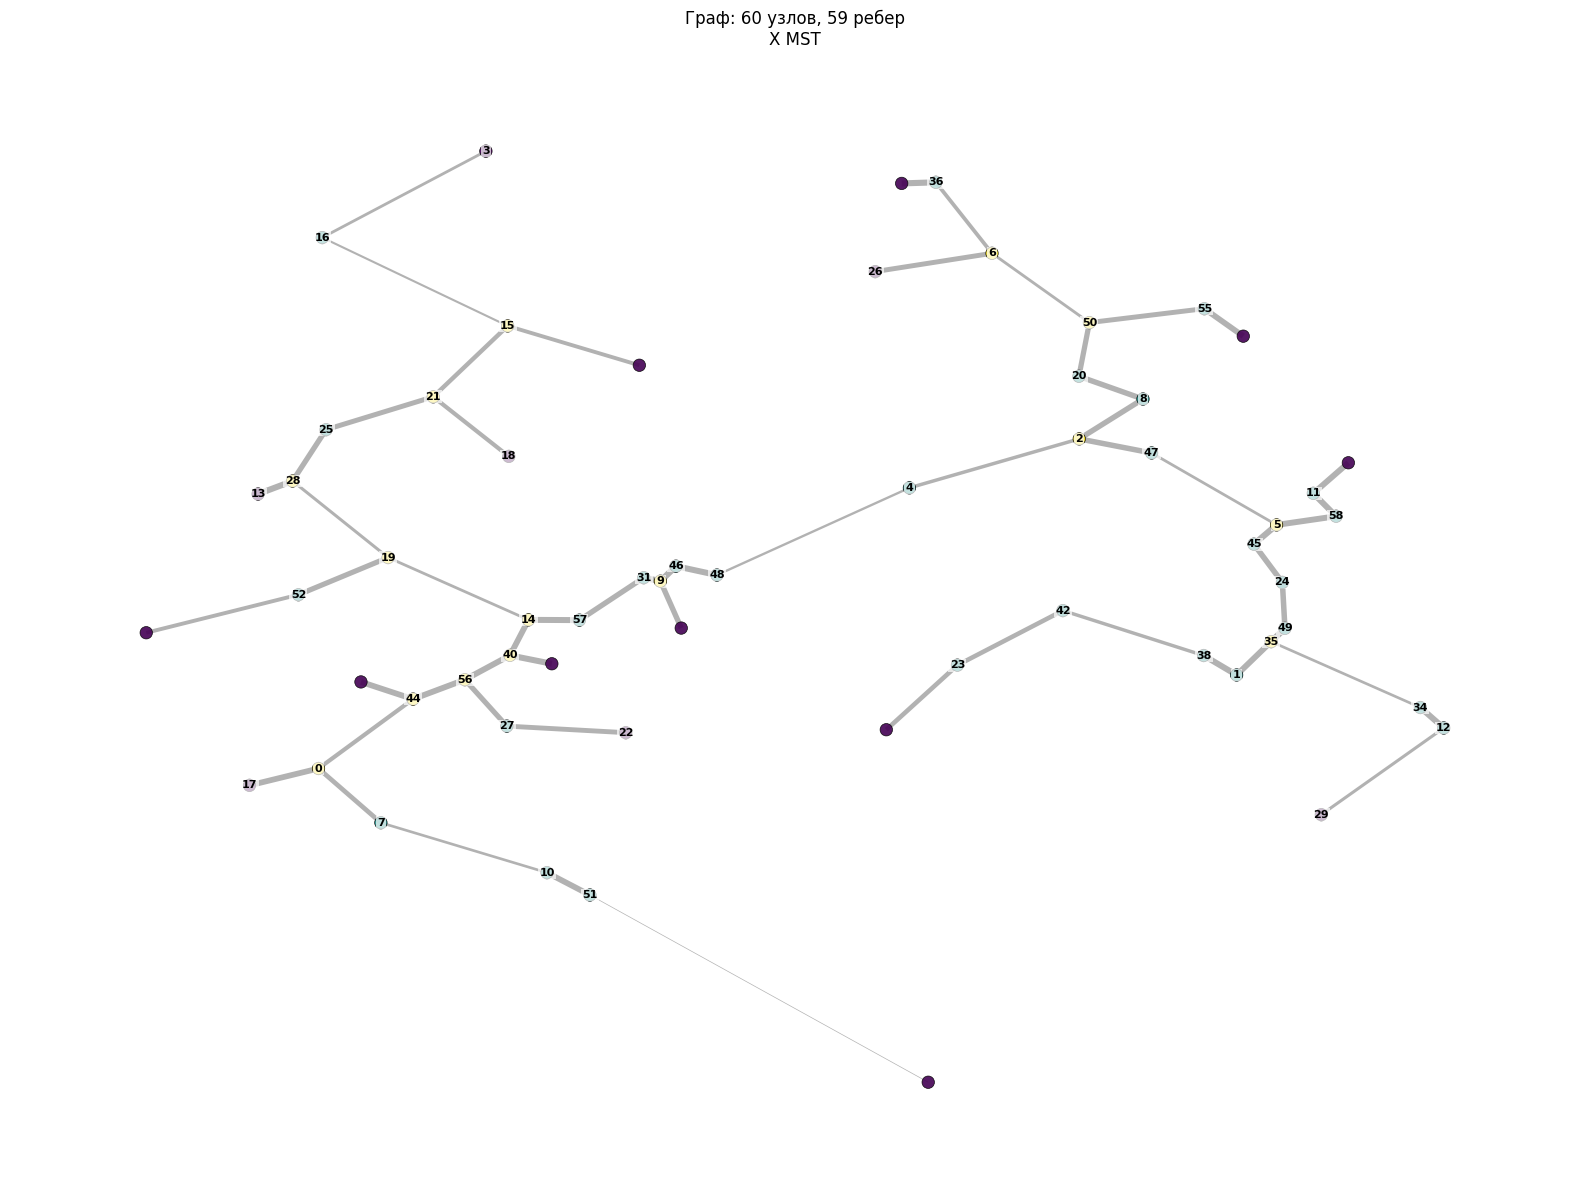

In [64]:
#@title Визуализация графа (расположение вершин - результат MDS)

draw_weighted_graph(X_MST_graph, layout='custom', show_labels='central', positions=X_mds, title="X MST")

[1 2 2 1 2 2 2 1 2 1 1 2 2 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1 1 2 1 1 2 1 2 2 2
 1 2 2 1 1 2 1 1 2 1 2 1 2 2 1 1 1 2 2 1 1 2 1]


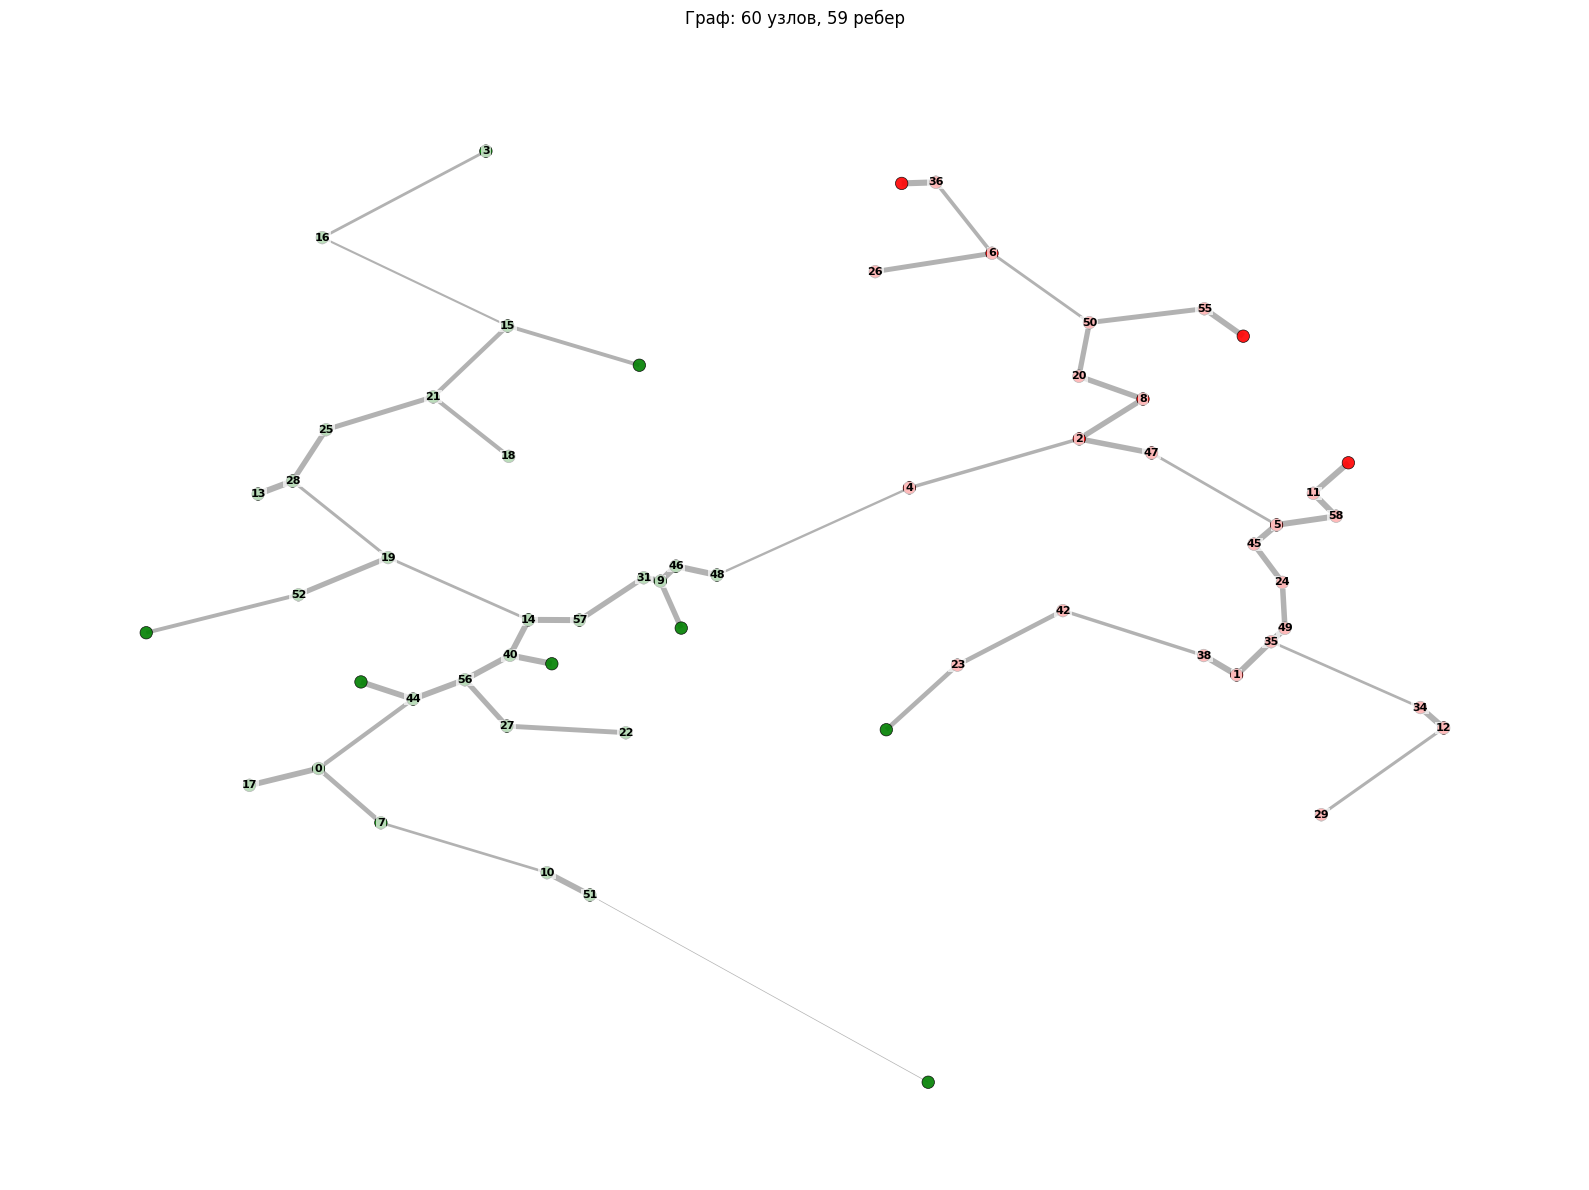

In [65]:
#@title Спектральная кластеризация на основе графовой модели (матрица смежности, нормализованный лапласиан)

def SpectralClustering(G, n_clusters=2):
  W = nx.adjacency_matrix(G)
  D = np.diag(np.sum(W, axis=1))
  D_inv_sqrt = np.diag(1.0 / np.sqrt(np.diag(D)))
  # L = I - D^(-1/2) * W * D^(-1/2)
  L = np.eye(X.shape[0]) - D_inv_sqrt @ W @ D_inv_sqrt
  eigenvalues, eigenvectors = np.linalg.eigh(L)
  idx = np.argsort(eigenvalues)[:n_clusters]
  embedding = eigenvectors[:, idx]
  # normalized embedding
  embedding = embedding / np.linalg.norm(embedding, axis=1, keepdims=True)

  kmeans = KMeans(n_clusters=n_clusters, random_state=12141, n_init=10)
  labels = kmeans.fit_predict(embedding) + 1

  print(labels)
  return labels


SC_labels_x = SpectralClustering(X_graph_model)
draw_weighted_graph(X_MST_graph, clusters=SC_labels_x, layout='custom', positions=X_mds)

Формула **коэффициента силуэта** для точки $x_i$:

$$s(i) = \frac{b(i) - a(i)}{max(a(i), b(i))}, \quad s \in [-1, 1]$$

Здесь:
* $a(i)$ - среднее расстояние до точек своего кластера
* $b(i)$ - минимальное среднее расстояние до другого кластера

In [66]:
#@title Подсчет коэффициента силуэта

from sklearn.metrics import silhouette_score

print(f'silhouette_score = {silhouette_score(X_dist_matrix, SC_labels_x, metric='precomputed'):.3f}')

silhouette_score = 0.441


Объяснение результатов:

* Коэффициент силуэта увеличивается при уменьшении $a(i)$ и увеличении $b(i)$, то есть мы хотим, чтобы внутрикластерные расстояния были маленькими, точки находились близко друг к другу, но чтобы внекластерные расстояния были большими, чтобы кластеры визуально находились далеко друг от друга.

* Идеальный результат кластеризации с точки зрения максимизации коэффициента силуэта две кучные группы, похожие на многомерное нормальное распределение.

* Результат кластеризации выше похож на разделение на два участка (2 blobs), поэтому коэффициент силуэта получился достаточно большим по значению

In [73]:
#@title RAND index (RI)

from sklearn.metrics.cluster import rand_score

print(f'rand_score = {rand_score(SC_labels_x.tolist(), y.tolist()):.3f}')

rand_score = 0.934


**Вывод:** результат спектральной кластеризации близок к разбиению из файла. Каждые 93.4 (из 100) пары принадлежат или не принадлежат одному кластеру в обоих разбиениях. Если разбиение из файла - эталонное разбиение, на которое следует равнятся, которое мы ожидаем получить от алгоритма кластеризации, то, учитывая полученное значение RI, то алгоритм спектральной кластеризации действительно способен выделять качество заемщика.